This chapter is adapted from Danielle Navarro's excellent [Learning Statistics with R](https://learningstatisticswithr.com) book and Matt Crump's [Answering Questions with Data](https://crumplab.github.io/statistics/probability-sampling-and-estimation.html).  The main text of Matt's version has mainly be left intact with a few modifications, also the code adapted to use python and jupyter. 

# Probability

> I have studied many languages-French, Spanish and a little Italian, but no one told me that Statistics was a foreign language. ---Charmaine J. Forde

Up to this point in the book, we've discussed some of the key ideas in experimental design, and we've talked a little about how you can summarize a data set. To a lot of people, this is all there is to statistics: it's about calculating averages, collecting all the numbers, drawing pictures, and putting them all in a report somewhere. Kind of like stamp collecting, but with numbers. However, statistics covers much more than that. In fact, descriptive statistics is one of the smallest parts of statistics, and one of the least powerful. The bigger and more useful part of statistics is that it provides tools **that let you make inferences about data**.

Once you start thinking about statistics in these terms – that statistics is there to help us draw inferences from data – you start seeing examples of it everywhere. For instance, here's a tiny extract from a newspaper article in the Sydney Morning Herald (30 Oct 2010):

> "I have a tough job," the Premier said in response to a poll which found her government is now the most unpopular Labor administration in polling history, with a primary vote of just 23 per cent.

This kind of remark is entirely unremarkable in the papers or in everyday life, but let's have a think about what it entails. A polling company has conducted a survey, usually a pretty big one because they can afford it. I'm too lazy to track down the original survey, so let's just imagine that they called 1000 voters at random, and 230 (23%) of those claimed that they intended to vote for the party. For the 2010 Federal election, the Australian Electoral Commission reported 4,610,795 enrolled voters in New South Whales; so the opinions of the remaining 4,609,795 voters (about 99.98% of voters) remain unknown to us. Even assuming that no-one lied to the polling company the only thing we can say with 100% confidence is that the true primary vote is somewhere between 230/4610795 (about 0.005%) and 4610025/4610795 (about 99.83%). So, on what basis is it legitimate for the polling company, the newspaper, and the readership to conclude that the ALP primary vote is only about 23%?

The answer to the question is pretty obvious: if I call 1000 people at random, and 230 of them say they intend to vote for the ALP, then it seems very unlikely that these are the **only** 230 people out of the entire voting public who actually intend to do so. In other words, we assume that the data collected by the polling company is pretty representative of the population at large. But how representative? Would we be surprised to discover that the true ALP primary vote is actually 24%? 29%? 37%? At this point everyday intuition starts to break down a bit. No-one would be surprised by 24%, and everybody would be surprised by 37%, but it's a bit hard to say whether 29% is plausible. We need some more powerful tools than just looking at the numbers and guessing.

**Inferential statistics** provides the tools that we need to answer these sorts of questions, and since these kinds of questions lie at the heart of the scientific enterprise, they take up the lions share of every introductory course on statistics and research methods. However, our tools for making statistical inferences are 1) built on top of **probability theory**, and 2) require an understanding of how samples behave when you take them from distributions (defined by probability theory...). So, this chapter has two main parts. A brief introduction to probability theory, and an introduction to sampling from distributions.




## How are probability and statistics different?

Before we start talking about probability theory, it's helpful to spend a moment thinking about the relationship between probability and statistics. The two disciplines are closely related but they're not identical. Probability theory is "the doctrine of chances". It's a branch of mathematics that tells you how often different kinds of events will happen. For example, all of these questions are things you can answer using probability theory:

-   What are the chances of a fair coin coming up heads 10 times in a row?

-   If I roll two six sided dice, how likely is it that I'll roll two sixes?

-   How likely is it that five cards drawn from a perfectly shuffled deck will all be hearts?

-   What are the chances that I'll win the lottery?

Notice that all of these questions have something in common. In each case the "truth of the world" is known, and my question relates to the "what kind of events" will happen. In the first question I **know** that the coin is fair, so there's a 50% chance that any individual coin flip will come up heads. In the second question, I **know** that the chance of rolling a 6 on a single die is 1 in 6. In the third question I **know** that the deck is shuffled properly. And in the fourth question, I **know** that the lottery follows specific rules. You get the idea. The critical point is that probabilistic questions start with a known *model* of the world, and we use that model to do some calculations. 

The underlying model can be quite simple. For instance, in the coin flipping example, we can write down the model like this: $P(\mbox{heads}) = 0.5$ which you can read as "the probability of heads is 0.5". 

As we'll see later, in the same way that percentages are numbers that range from 0% to 100%, probabilities are just numbers that range from 0 to 1. When using this probability model to answer the first question, I don't actually know exactly what's going to happen. Maybe I'll get 10 heads, like the question says. But maybe I'll get three heads. That's the key thing: in probability theory, the **model** is known, but the **data** are not.

So that's probability. What about statistics? Statistical questions work the other way around. In statistics, we know the truth about the world. All we have is the data, and it is from the data that we want to **learn** the truth about the world. Statistical questions tend to look more like these:

-   If my friend flips a coin 10 times and gets 10 heads, are they playing a trick on me?

-   If five cards off the top of the deck are all hearts, how likely is it that the deck was shuffled?

-   If the lottery commissioner's spouse wins the lottery, how likely is it that the lottery was rigged?

This time around, the only thing we have are data. What I **know** is that I saw my friend flip the coin 10 times and it came up heads every time. And what I want to *infer* is whether or not I should conclude that what I just saw was actually a fair coin being flipped 10 times in a row, or whether I should suspect that my friend is playing a trick on me. The data I have look like this:

    H H H H H H H H H H H

and what I'm trying to do is work out which "model of the world" I should put my trust in. If the coin is fair, then the model I should adopt is one that says that the probability of heads is 0.5; that is, $P(\mbox{heads}) = 0.5$. If the coin is not fair, then I should conclude that the probability of heads is **not** 0.5, which we would write as $P(\mbox{heads}) \neq 0.5$. In other words, the statistical inference problem is to figure out which of these probability models is right. Clearly, the statistical question isn't the same as the probability question, but they're deeply connected to one another. Because of this, a good introduction to statistical theory will start with a discussion of what probability is and how it works.

## What does probability mean?

Let's start with the first of these questions. What is "probability"? It might seem surprising to you, but while statisticians and mathematicians (mostly) agree on what the **rules** of probability are, there's much less of a consensus on what the word really **means**. It seems weird because we're all very comfortable using words like "chance", "likely", "possible" and "probable", and it doesn't seem like it should be a very difficult question to answer. If you had to explain "probability" to a five year old, you could do a pretty good job. But if you've ever had that experience in real life, you might walk away from the conversation feeling like you didn't quite get it right, and that (like many everyday concepts) it turns out that you don't **really** know what it's all about.

So I'll have a go at it. Let's suppose I want to bet on a soccer game between two teams of robots, **Arduino Arsenal** and **C Milan**. After thinking about it, I decide that there is an 80% probability that **Arduino Arsenal** winning. What do I mean by that? Here are three possibilities...

-   They're robot teams, so I can make them play over and over again, and if I did that, **Arduino Arsenal** would win 8 out of every 10 games on average.

-   For any given game, I would only agree that betting on this game is only "fair" if a $\$1$ bet on **C Milan** gives a $\$5$ payoff (i.e. I get my $\$1$ back plus a $\$4$ reward for being correct), as would a $\$4$ bet on **Arduino Arsenal** (i.e., my $\$4$ bet plus a $\$1$ reward).

-   My subjective "belief" or "confidence" in an **Arduino Arsenal** victory is four times as strong as my belief in a **C Milan** victory.

Each of these seems sensible. However they're not identical, and not every statistician would endorse all of them. The reason is that there are different statistical ideologies (yes, really!) and depending on which one you subscribe to, you might say that some of those statements are meaningless or irrelevant. In this section, I give a brief introduction the two main approaches that exist in the literature. These are by no means the only approaches, but they're the two big ones.

### The frequentist view

The first of the two major approaches to probability, and the more dominant one in statistics, is referred to as the *frequentist view*, and it defines probability as a *long-run frequency*. Suppose we were to try flipping a fair coin, over and over again. By definition, this is a coin that has $P(H) = 0.5$. What might we observe? One possibility is that the first 20 flips might look like this:

    T,H,H,H,H,T,T,H,H,H,H,T,H,H,T,T,T,T,T,H

In this case 11 of these 20 coin flips (55%) came up heads. Now suppose that I'd been keeping a running tally of the number of heads (which I'll call $N_H$) that I've seen, across the first $N$ flips, and calculate the proportion of heads $N_H / N$ every time. Here's what I'd get (I did literally flip coins to produce this!):


| number of flips  |   1  |   2 |  3  | 4   |  5  |  6  | 7   | 8   | 9   | 10  |
| -----------------|----- |-----| ----- | ----- | ----- | ----- | ----- | ----- | ----- | -----
| number of heads  |  0   | 1   | 2   | 3   | 4   | 4   | 4   | 5   | 6   | 7   |
| proportion       | .00  | .50 | .67 | .75 | .80 |  .67|.57  | .63 | .67 | .70 |


continuing...

|number of flips    |11    |12   | 13    |14     |15     | 16    | 17    | 18    |19     |20
| -----------------|----- |-----| ----- | ----- | ----- | ----- | ----- | ----- | ----- | -----
|number of heads    | 8    | 8   | 9     |10     | 10    | 10    | 10    | 10    |10     |11
|proportion         |.73   |.67  |.69    |.71    | .67   | .63   | .59   | .56   |.53    |.55

Notice that at the start of the sequence, the **proportion** of heads fluctuates wildly, starting at .00 and rising as high as .80. Later on, one gets the impression that it dampens out a bit, with more and more of the values actually being pretty close to the "right" answer of .50. This is the frequentist definition of probability in a nutshell: flip a fair coin over and over again, and as $N$ grows large (approaches infinity, denoted $N\rightarrow \infty$), the proportion of heads will converge to 50%. There are some subtle technicalities that the mathematicians care about, but qualitatively speaking, that's how the frequentists define probability. Unfortunately, I don't have an infinite number of coins, or the infinite patience required to flip a coin an infinite number of times. However, I do have a computer, and computers excel at mindless repetitive tasks. So I asked my computer to simulate flipping a coin 1000 times, and then drew a picture of what happens to the proportion $N_H / N$ as $N$ increases. Actually, I did it four times, just to make sure it wasn't a fluke. The results are shown in Figure [fig:frequentistprobability]. As you can see, the **proportion of observed heads** eventually stops fluctuating, and settles down; when it does, the number at which it finally settles is the true probability of heads.


<img src="../../images/navarro_img/probability/frequentistProb-eps-converted-to.png" alt="cogsci logo" width="550"/>

<center>
    <b>Figure 1</b>. An illustration of how frequentist probability works. If you flip a fair coin over and over again, the proportion of heads that you've seen eventually settles down, and converges to the true probability of 0.5. Each panel shows four different simulated experiments: in each case, we pretend we flipped a coin 1000 times, and kept track of the proportion of flips that were heads as we went along. Although none of these sequences actually ended up with an exact value of .5, if we'd extended the experiment for an infinite number of coin flips they would have.
<center>

The frequentist definition of probability has some desirable characteristics. First, it is objective: the probability of an event is **necessarily** grounded in the world. The only way that probability statements can make sense is if they refer to (a sequence of) events that occur in the physical universe. Second, it is unambiguous: any two people watching the same sequence of events unfold, trying to calculate the probability of an event, must inevitably come up with the same answer. 

However, it also has undesirable characteristics. Infinite sequences don't exist in the physical world. Suppose you picked up a coin from your pocket and started to flip it. Every time it lands, it impacts on the ground. Each impact wears the coin down a bit; eventually, the coin will be destroyed. So, one might ask whether it really makes sense to pretend that an "infinite" sequence of coin flips is even a meaningful concept, or an objective one. We can't say that an "infinite sequence" of events is a real thing in the physical universe, because the physical universe doesn't allow infinite anything. 

More seriously, the frequentist definition has a narrow scope. There are lots of things out there that human beings are happy to assign probability to in everyday language, but cannot (even in theory) be mapped onto a hypothetical sequence of events. For instance, if a meteorologist comes on TV and says, "the probability of rain in Adelaide on 2 November 2048 is 60%" we humans are happy to accept this. But it's not clear how to define this in frequentist terms. There's only one city of Adelaide, and only 2 November 2048. There's no infinite sequence of events here, just a once-off thing. Frequentist probability genuinely **forbids** us from making probability statements about a single event. From the frequentist perspective, it will either rain tomorrow or it will not; there is no "probability" that attaches to a single non-repeatable event. Now, it should be said that there are some very clever tricks that frequentists can use to get around this. One possibility is that what the meteorologist means is something like this: "There is a category of days for which I predict a 60% chance of rain; if we look only across those days for which I make this prediction, then on 60% of those days it will actually rain". It's very weird and counterintuitive to think of it this way, but you do see frequentists do this sometimes.

### The Bayesian view

The **Bayesian view** of probability is often called the subjectivist view, and it is a minority view among statisticians, but one that has been steadily gaining traction for the last several decades. There are many flavours of Bayesianism, making hard to say exactly what "the" Bayesian view is. The most common way of thinking about subjective probability is to define the probability of an event as the **degree of belief** that an intelligent and rational agent assigns to that truth of that event. From that perspective, probabilities don't exist in the world, but rather in the thoughts and assumptions of people and other intelligent beings. However, in order for this approach to work, we need some way of operationalising "degree of belief". One way that you can do this is to formalise it in terms of "rational gambling", though there are many other ways. Suppose that I believe that there's a 60% probability of rain tomorrow. If someone offers me a bet: if it rains tomorrow, then I win $\$5$, but if it doesn't rain then I lose $\$5$. Clearly, from my perspective, this is a pretty good bet. On the other hand, if I think that the probability of rain is only 40%, then it's a bad bet to take. Thus, we can operationalise the notion of a "subjective probability" in terms of what bets I'm willing to accept.

What are the advantages and disadvantages to the Bayesian approach? The main advantage is that it allows you to assign probabilities to any event you want to. You don't need to be limited to those events that are repeatable. The main disadvantage (to many people) is that we can't be purely objective – specifying a probability requires us to specify an entity that has the relevant degree of belief. This entity might be a human, an alien, a robot, or even a statistician, but there has to be an intelligent agent out there that believes in things. To many people this is uncomfortable: it seems to make probability arbitrary. While the Bayesian approach does require that the agent in question be rational (i.e., obey the rules of probability), it does allow everyone to have their own beliefs; I can believe the coin is fair and you don't have to, even though we're both rational. The frequentist view doesn't allow any two observers to attribute different probabilities to the same event: when that happens, then at least one of them must be wrong. The Bayesian view does not prevent this from occurring. Two observers with different background knowledge can legitimately hold different beliefs about the same event. In short, where the frequentist view is sometimes considered to be too narrow (forbids lots of things that that we want to assign probabilities to), the Bayesian view is sometimes thought to be too broad (allows too many differences between observers).

### What's the difference? And who is right?

Now that you've seen each of these two views independently, it's useful to make sure you can compare the two. Go back to the hypothetical robot soccer game at the start of the section. What do you think a frequentist and a Bayesian would say about these three statements? Which statement would a frequentist say is the correct definition of probability? Which one would a Bayesian do? Would some of these statements be meaningless to a frequentist or a Bayesian? If you've understood the two perspectives, you should have some sense of how to answer those questions.

Okay, assuming you understand the different, you might be wondering which of them is **right**? Honestly, I don't know that there is a right answer. As far as I can tell there's nothing mathematically incorrect about the way frequentists think about sequences of events, and there's nothing mathematically incorrect about the way that Bayesians define the beliefs of a rational agent. In fact, when you dig down into the details, Bayesians and frequentists actually agree about a lot of things. Many frequentist methods lead to decisions that Bayesians agree a rational agent would make. Many Bayesian methods have very good frequentist properties.

For the most part, I'm a pragmatist so I'll use any statistical method that I trust. As it turns out, that makes me prefer Bayesian methods, for reasons I'll explain towards the end of the book, but I'm not fundamentally opposed to frequentist methods. Not everyone is quite so relaxed. For instance, consider Sir Ronald Fisher, one of the towering figures of 20th century statistics and a vehement opponent to all things Bayesian, whose paper on the mathematical foundations of statistics referred to Bayesian probability as "an impenetrable jungle [that] arrests progress towards precision of statistical concepts" @Fisher1922b [p. 311]. Or the psychologist Paul Meehl, who suggests that relying on frequentist methods could turn you into "a potent but sterile intellectual rake who leaves in his merry path a long train of ravished maidens but no viable scientific offspring" @Meehl1967 [p. 114]. The history of statistics, as you might gather, is not devoid of entertainment.

## Basic probability theory

Ideological arguments between Bayesians and frequentists notwithstanding, it turns out that people mostly agree on the rules that probabilities should obey. There are lots of different ways of arriving at these rules. The most commonly used approach is based on the work of Andrey Kolmogorov, one of the great Soviet mathematicians of the 20th century. I won't go into a lot of detail, but I'll try to give you a bit of a sense of how it works. And in order to do so, I'm going to have to talk about my pants.

### Introducing probability distributions

One of the disturbing truths about my life is that I only own 5 pairs of pants: three pairs of jeans, the bottom half of a suit, and a pair of tracksuit pants. Even sadder, I've given them names: I call them $X_1$, $X_2$, $X_3$, $X_4$ and $X_5$. I really do: that's why they call me Mister Imaginative. Now, on any given day, I pick out exactly one of pair of pants to wear. Not even I'm so stupid as to try to wear two pairs of pants, and thanks to years of training I never go outside without wearing pants anymore. If I were to describe this situation using the language of probability theory, I would refer to each pair of pants (i.e., each $X$) as an *elementary event*. The key characteristic of elementary events is that every time we make an observation (e.g., every time I put on a pair of pants), then the outcome will be one and only one of these events. Like I said, these days I always wear exactly one pair of pants, so my pants satisfy this constraint. Similarly, the set of all possible events is called a *sample space*. Granted, some people would call it a "wardrobe", but that's because they're refusing to think about my pants in probabilistic terms. Sad.

Okay, now that we have a sample space (a wardrobe), which is built from lots of possible elementary events (pants), what we want to do is assign a *probability* of one of these elementary events. For an event $X$, the probability of that event $P(X)$ is a number that lies between 0 and 1. The bigger the value of $P(X)$, the more likely the event is to occur. So, for example, if $P(X) = 0$, it means the event $X$ is impossible (i.e., I never wear those pants). On the other hand, if $P(X) = 1$ it means that event $X$ is certain to occur (i.e., I always wear those pants). For probability values in the middle, it means that I sometimes wear those pants. For instance, if $P(X) = 0.5$ it means that I wear those pants half of the time.

At this point, we're almost done. The last thing we need to recognise is that "something always happens". Every time I put on pants, I really do end up wearing pants (crazy, right?). What this somewhat trite statement means, in probabilistic terms, is that the probabilities of the elementary events need to add up to 1. This is known as the *law of total probability*, not that any of us really care. More importantly, if these requirements are satisfied, then what we have is a *probability distribution*. For example, this is an example of a probability distribution

| Which pants?     | Label |   Probability 
| ---------------- |-------| ----------------
| Blue jeans       |$X_1$  | $P(X_1) = .5$
| Grey jeans       |$X_2$  | $P(X_2) = .3$
| Black jeans      |$X_3$  | $P(X_3) = .1$
| Black suit       |$X_4$  | $P(X_4) = 0$
| Blue tracksuit   |$X_5$  | $P(X_5) = .1$

Each of the events has a probability that lies between 0 and 1, and if we add up the probability of all events, they sum to 1. Awesome. We can even draw a nice bar graph to visualise this distribution, as shown in Figure \@ref(fig:4pantsprob). And at this point, we've all achieved something. You've learned what a probability distribution is, and I've finally managed to find a way to create a graph that focuses entirely on my pants. Everyone wins!

<img src="../../images/navarro_img/probability/pantsDistribution-eps-converted-to.png" alt="pants" width="550"/>


The only other thing that I need to point out is that probability theory allows you to talk about *non elementary events* as well as elementary ones. The easiest way to illustrate the concept is with an example. In the pants example, it's perfectly legitimate to refer to the probability that I wear jeans. In this scenario, the "Dan wears jeans" event said to have happened as long as the elementary event that actually did occur is one of the appropriate ones; in this case "blue jeans", "black jeans" or "grey jeans". In mathematical terms, we defined the "jeans" event $E$ to correspond to the set of elementary events $(X_1, X_2, X_3)$. If any of these elementary events occurs, then $E$ is also said to have occurred. Having decided to write down the definition of the $E$ this way, it's pretty straightforward to state what the probability $P(E)$ is: we just add everything up. In this particular case $$P(E) = P(X_1) + P(X_2) + P(X_3)$$ and, since the probabilities of blue, grey and black jeans respectively are .5, .3 and .1, the probability that I wear jeans is equal to .9.


At this point you might be thinking that this is all terribly obvious and simple and you'd be right. All we've really done is wrap some basic mathematics around a few common sense intuitions. However, from these simple beginnings it's possible to construct some extremely powerful mathematical tools. I'm definitely not going to go into the details in this book, but what I will do is list some of the other rules that probabilities satisfy. These rules can be derived from the simple assumptions that I've outlined above, but since we don't actually use these rules for anything in this book, I won't do so here.

Some basic rules that probabilities must satisfy. You don't really need to know these rules in order to understand the analyses that we'll talk about later in the book, but they are important if you want to understand probability theory a bit more deeply.

  |English      |       Math Notation |   |  Mathematical Formula
  |-------------|--------------- |-----|----------------------------
  |not $A$      |    $P(\neg A)$ | $=$ | $1-P(A)$
  |$A$ or $B$   |  $P(A \cup B)$ | $=$ | $P(A) + P(B) - P(A \cap B)$
  |$A$ and $B$  |  $P(A \cap B)$ | $=$ | $P(A\|B) P(B)$

Now that we have the ability to "define" non-elementary events in terms of elementary ones, we can actually use this to construct (or, if you want to be all mathematicallish, "derive") some of the other rules of probability. These rules are listed above, and while I'm pretty confident that very few of my readers actually care about how these rules are constructed, I'm going to show you anyway: even though it's boring and you'll probably never have a lot of use for these derivations, if you read through it once or twice and try to see how it works, you'll find that probability starts to feel a bit less mysterious, and with any luck a lot less daunting. So here goes. Firstly, in order to construct the rules I'm going to need a sample space $X$ that consists of a bunch of elementary events $x$, and two non-elementary events, which I'll call $A$ and $B$. Let's say: $$\begin{array}{rcl}
X &=& (x_1, x_2, x_3, x_4, x_5) \\
A &=& (x_1, x_2, x_3) \\
B &=& (x_3, x_4)
\end{array}$$ To make this a bit more concrete, let's suppose that we're still talking about the pants distribution. If so, $A$ corresponds to the event "jeans", and $B$ corresponds to the event "black": $$\begin{array}{rcl}
\mbox{``jeans''} &=& (\mbox{``blue jeans''}, \mbox{``grey jeans''}, \mbox{``black jeans''}) \\
\mbox{``black''} &=& (\mbox{``black jeans''}, \mbox{``black suit''})
\end{array}$$ So now let's start checking the rules that I've listed in the table.

In the first line, the table says that $$P(\neg A) = 1- P(A)$$ and what it **means** is that the probability of "not $A$" is equal to 1 minus the probability of $A$. A moment's thought (and a tedious example) make it obvious why this must be true. If $A$ coresponds to the even that I wear jeans (i.e., one of $x_1$ or $x_2$ or $x_3$ happens), then the only meaningful definitionof "not $A$" (which is mathematically denoted as $\neg A$) is to say that $\neg A$ consists of **all** elementary events that don't belong to $A$. In the case of the pants distribution it means that $\neg A = (x_4, x_5)$, or, to say it in English: "not jeans" consists of all pairs of pants that aren't jeans (i.e., the black suit and the blue tracksuit). Consequently, every single elementary event belongs to either $A$ or $\neg A$, but not both. Okay, so now let's rearrange our statement above: $$P(\neg A) + P(A) = 1$$ which is a trite way of saying either I do wear jeans or I don't wear jeans: the probability of "not jeans" plus the probability of "jeans" is 1. Mathematically: $$\begin{array}{rcl}
P(\neg A) &=&  P(x_4) + P(x_5) \\
P(A) &=& P(x_1) + P(x_2) + P(x_3) 
\end{array}$$ so therefore $$\begin{array}{rcl} 
P(\neg A) + P(A) &=& P(x_1) + P(x_2) + P(x_3) + P(x_4) + P(x_5) \\
&=& \sum_{x \in X} P(x) \\
&=& 1
\end{array}$$ Excellent. It all seems to work.

Wow, I can hear you saying. That's a lot of $x$s to tell me the freaking obvious. And you're right: this **is** freaking obvious. The whole **point** of probability theory to to formalise and mathematise a few very basic common sense intuitions. So let's carry this line of thought forward a bit further. In the last section I defined an event corresponding to **not** A, which I denoted $\neg A$. Let's now define two new events that correspond to important everyday concepts: $A$ **and** $B$, and $A$ **or** $B$. To be precise:

  |English statement:                     | Mathematical notation: 
  |-------------------------------------- |------------------------
  |"$A$ and $B$" both happen              |     $A \cap B$        
  |at least one of "$A$ or $B$" happens   |      $A \cup B$    

Since $A$ and $B$ are both defined in terms of our elementary events (the $x$s) we're going to need to try to describe $A \cap B$ and $A \cup B$ in terms of our elementary events too. Can we do this? Yes we can The only way that both $A$ and $B$ can occur is if the elementary event that we observe turns out to belong to both $A$ and $B$. Thus "$A \cap B$" includes only those elementary events that belong to both $A$ and $B$... $$\begin{array}{rcl}
A &=& (x_1, x_2, x_3) \\
B &=& (x_3, x_4) \\
A \cap B & = & (x_3) 
\end{array}$$ So, um, the only way that I can wear "jeans" $(x_1, x_2, x_3)$ and "black pants" $(x_3, x_4)$ is if I wear "black jeans" $(x_3)$. Another victory for the bloody obvious.

At this point, you're not going to be at all shocked by the definition of $A \cup B$, though you're probably going to be extremely bored by it. The only way that I can wear "jeans" or "black pants" is if the elementary pants that I actually do wear belongs to $A$ or to $B$, or to both. So... $$\begin{array}{rcl}
A &=& (x_1, x_2, x_3) \\
B &=& (x_3, x_4) \\
A \cup B & = & (x_1, x_2, x_3, x_4) 
\end{array}$$ Oh yeah baby. Mathematics at its finest.

So, we've defined what we mean by $A \cap B$ and $A \cup B$. Now let's assign probabilities to these events. More specifically, let's start by verifying the rule that claims that: $$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$ Using our definitions earlier, we know that $A \cup B = (x_1, x_2, x_3, x_4)$, so $$P(A \cup B) = P(x_1) + P(x_2) + P(x_3) + P(x_4)$$ and making similar use of the fact that we know what elementary events belong to $A$, $B$ and $A \cap B$.... $$\begin{array}{rcl}
P(A)  &=&   P(x_1) + P(x_2) + P(x_3)    \\
P(B) &=&  P(x_3) + P(x_4)  \\
P(A \cap B) &=&  P(x_3)
\end{array}$$ and therefore $$\begin{array}{rcl}
P(A) + P(B) - P(A \cap B)
&=&  P(x_1) + P(x_2) + P(x_3) +  P(x_3) + P(x_4) -  P(x_3) \\
&=& P(x_1) + P(x_2) + P(x_3) + P(x_4) \\
&=& P(A \cup B)
\end{array}$$ Done.

The next concept we need to define is the notion of "$B$ given $A$", which is typically written $B | A$. Here's what I mean: suppose that I get up one morning, and put on a pair of pants. An elementary event $x$ has occurred. Suppose further I yell out to my wife (who is in the other room, and so cannot see my pants) "I'm wearing jeans today!". Assuming that she believes that I'm telling the truth, she knows that $A$ is true. **Given** that she knows that $A$ has happened, what is the **conditional probability** that $B$ is also true? Well, let's think about what she knows. Here are the facts:

-   **The non-jeans events are impossible**. If $A$ is true, then we know that the only possible elementary events that could have occurred are $x_1$, $x_2$ and $x_3$ (i.e.,the jeans). The non-jeans events $x_4$ and $x_5$ are now impossible, and must be assigned probability zero. In other words, our **sample space** has been restricted to the jeans events. But it's still the case that the probabilities of these these events **must** sum to 1: we know for sure that I'm wearing jeans.

-   **She's learned nothing about which jeans I'm wearing**. Before I made my announcement that I was wearing jeans, she already knew that I was five times as likely to be wearing blue jeans ($P(x_1) = 0.5$) than to be wearing black jeans ($P(x_3) = 0.1$). My announcement doesn't change this... I said **nothing** about what colour my jeans were, so it must remain the case that $P(x_1) / P(x_3)$ stays the same, at a value of 5.

There's only one way to satisfy these constraints: set the impossible events to have zero probability (i.e., $P(x | A) = 0$ if $x$ is not in $A$), and then divide the probabilities of all the others by $P(A)$. In this case, since $P(A) = 0.9$, we divide by 0.9. This gives:

  |which pants?     |elementary event   |old prob, $P(x)$  | new prob, $P(x | A)$
  |---------------- |------------------ |------------------|----------------------
  |blue jeans       |$x_1$              |      0.5         |       0.556
  |grey jeans       |$x_2$              |      0.3         |       0.333
  |black jeans      |$x_3$              |      0.1         |       0.111
  |black suit       |$x_4$              |       0          |         0
  |blue tracksuit   |$x_5$              |      0.1         |         0

In mathematical terms, we say that $$P(x | A) = \frac{P(x)}{P(A)}$$ if $x \in A$, and $P(x|A) = 0$ otherwise. And therefore... $$\begin{array}{rcl}
P(B | A) &=& P(x_3 | A)  + P(x_4 | A) \\ \\
&=&  \displaystyle\frac{P(x_3)}{P(A)} + 0    \\ \\
&=& \displaystyle\frac{P(x_3)}{P(A)}
\end{array}$$ Now, recalling that $A \cap B = (x_3)$, we can write this as $$P(B | A) = \frac{P(A \cap B)}{P(A)}$$ and if we multiply both sides by $P(A)$ we obtain: $$P(A \cap B) = P(B| A) P(A)$$ which is the third rule that we had listed in the table.

## The binomial distribution

As you might imagine, probability distributions vary enormously, and there's an enormous range of distributions out there. However, they aren't all equally important. In fact, the vast majority of the content in this book relies on one of five distributions: the binomial distribution, the normal distribution, the $t$ distribution, the $\chi^2$ ("chi-square") distribution and the $F$ distribution. Given this, what I'll do over the next few sections is provide a brief introduction to all five of these, paying special attention to the binomial and the normal. I'll start with the binomial distribution, since it's the simplest of the five.

### Introducing the binomial

The theory of probability originated in the attempt to describe how games of chance work, so it seems fitting that our discussion of the *binomial distribution* should involve a discussion of rolling dice and flipping coins. Let's imagine a simple "experiment": in my hot little hand I'm holding 20 identical six-sided dice. On one face of each die there's a picture of a skull; the other five faces are all blank. If I proceed to roll all 20 dice, what's the probability that I'll get exactly 4 skulls? Assuming that the dice are fair, we know that the chance of any one die coming up skulls is 1 in 6; to say this another way, the skull probability for a single die is approximately $.167$. This is enough information to answer our question, so let's have a look at how it's done.

As usual, we'll want to introduce some names and some notation. We'll let $N$ denote the number of dice rolls in our experiment; which is often referred to as the *size parameter* of our binomial distribution. We'll also use $\theta$ to refer to the the probability that a single die comes up skulls, a quantity that is usually called the *success probability* of the binomial. Finally, we'll use $X$ to refer to the results of our experiment, namely the number of skulls I get when I roll the dice. Since the actual value of $X$ is due to chance, we refer to it as a *random variable*. In any case, now that we have all this terminology and notation, we can use it to state the problem a little more precisely. The quantity that we want to calculate is the probability that $X = 4$ given that we know that $\theta = .167$ and $N=20$. The general "form" of the thing I'm interested in calculating could be written as $$P(X \ | \ \theta, N)$$ and we're interested in the special case where $X=4$, $\theta = .167$ and $N=20$. There's only one more piece of notation I want to refer to before moving on to discuss the solution to the problem. If I want to say that $X$ is generated randomly from a binomial distribution with parameters $\theta$ and $N$, the notation I would use is as follows: $$X \sim \mbox{Binomial}(\theta, N)$$

Yeah, yeah. I know what you're thinking: notation, notation, notation. Really, who cares? Very few readers of this book are here for the notation, so I should probably move on and talk about how to use the binomial distribution. I've included the formula for the binomial distribution in Table [tab:distformulas], since some readers may want to play with it themselves, but since most people probably don't care that much and because we don't need the formula in this book, I won't talk about it in any detail. Instead, I just want to show you what the binomial distribution looks like. To that end, Figure \@ref(fig:4binomial1) plots the binomial probabilities for all possible values of $X$ for our dice rolling experiment, from $X=0$ (no skulls) all the way up to $X=20$ (all skulls). Note that this is basically a bar chart, and is no different to the "pants probability" plot I drew in Figure \@ref(fig:4pantsprob). On the horizontal axis we have all the possible events, and on the vertical axis we can read off the probability of each of those events. So, the probability of rolling 4 skulls out of 20 times is about 0.20 (the actual answer is 0.2022036, as we'll see in a moment). In other words, you'd expect that to happen about 20% of the times you repeated this experiment.



<img src="../../images/navarro_img/probability/binomSkulls20-eps-converted-to.png" alt="skulls" width="550"/>

<center>
The binomial distribution with size parameter of N =20 and an underlying success probability of 1/6. Each vertical bar depicts the probability of one specific outcome (i.e., one possible value of X). Because this is a probability distribution, each of the probabilities must be a number between 0 and 1, and the heights of the bars must sum to 1 as well.
</center>

### Working with the binomial distribution in Python

Python has a function called `binom.pdf` that calculates binomial probabilities for us. The main arguments to the function are


- `k` This is a number, or vector of numbers, specifying the outcomes whose probability you're trying to calculate.

- `n` This is a number telling python the size of the experiment.

- `p` This is the success probability for any one trial in the experiment.

So, in order to calculate the probability of getting skulls, from an experiment of trials, in which the probability of getting a skull on any one trial is ... well, the command I would use is simply this:

In [6]:
import scipy.stats as stats
stats.binom.pmf(k=4, n=20, p=1/6)

0.20220358121717216

To give you a feel for how the binomial distribution changes when we alter the values of $\theta$ and $N$, let's suppose that instead of rolling dice, I'm actually flipping coins. This time around, my experiment involves flipping a fair coin repeatedly, and the outcome that I'm interested in is the number of heads that I observe. In this scenario, the success probability is now $\theta = 1/2$. Suppose I were to flip the coin $N=20$ times. In this example, I've changed the success probability, but kept the size of the experiment the same. What does this do to our binomial distribution? 

<img src="../../images/navarro_img/probability/Binomial2.png" alt="skulls" width="550"/>

<center>
Two binomial distributions, involving a scenario in which I'm flipping a fair coin, so the underlying success probability is 1/2. In panel (a), we assume I'm flipping the coin N = 20 times. In panel (b) we assume that the coin is flipped N = 100 times.</center>

Well, as Figure \@ref(fig:4binomial2)a shows, the main effect of this is to shift the whole distribution, as you'd expect. Okay, what if we flipped a coin $N=100$ times? Well, in that case, we get Figure \@ref(fig:4binomial2)b. The distribution stays roughly in the middle, but there's a bit more variability in the possible outcomes.

## The normal distribution

While the binomial distribution is conceptually the simplest distribution to understand, it's not the most important one. That particular honour goes to the *normal distribution*, which is also referred to as "the bell curve" or a "Gaussian distribution". 

<img src="../../images/navarro_img/probability/standardNormal-eps-converted-to.png" alt="normal" width="550"/>

<center>
The normal distribution with mean = 0 and standard deviation = 1. The x-axis corresponds to the value of some variable, and the y-axis tells us something about how likely we are to observe that value. However, notice that the y-axis is labelled Probability Density and not Probability. There is a subtle and somewhat frustrating characteristic of continuous distributions that makes the y axis behave a bit oddly: the height of the curve here isn't actually the probability of observing a particular x value. On the other hand, it is true that the heights of the curve tells you which x values are more likely (the higher ones!).
</center>
    

A normal distribution is described using two parameters, the mean of the distribution $\mu$ and the standard deviation of the distribution $\sigma$. The notation that we sometimes use to say that a variable $X$ is normally distributed is as follows: $$X \sim \mbox{Normal}(\mu,\sigma)$$ Of course, that's just notation. It doesn't tell us anything interesting about the normal distribution itself. The mathematical formula for the normal distribution is:

<img src="../../images/navarro_img/probability/Normal_formula.png" alt="normal" width="350"/>

<center>
Formula for the normal distribution
</center>

The formula is important enough that everyone who learns statistics should at least look at it, but since this is an introductory text I don't want to focus on it to much. 

Instead of focusing on the maths, let's try to get a sense for what it means for a variable to be normally distributed. To that end, have a look at Figure \@ref(fig:4normal), which plots a normal distribution with mean $\mu = 0$ and standard deviation $\sigma = 1$. You can see where the name "bell curve" comes from: it looks a bit like a bell. Notice that, unlike the plots that I drew to illustrate the binomial distribution, the picture of the normal distribution in Figure \@ref(fig:4normal) shows a smooth curve instead of "histogram-like" bars. This isn't an arbitrary choice: the normal distribution is continuous, whereas the binomial is discrete. For instance, in the die rolling example from the last section, it was possible to get 3 skulls or 4 skulls, but impossible to get 3.9 skulls.

With this in mind, let's see if we can't get an intuition for how the normal distribution works. Firstly, let's have a look at what happens when we play around with the parameters of the distribution. One parameter we can change is the mean. This will shift the distribution to the right or left. The animation below shows a normal distribution with mean = 0, moving up and down from mean = 0 to mean = 5. Note, when you change the mean the whole shape of the distribution does not change, it just shifts from left to right. In the animation the normal distribution bounces up and down a little, but that's just a quirk of the animation (plus it looks fund that way).

<img src="../../images/gifs/normalMovingMean-1.gif" alt="skulls" width="550"/>

<center>A normal distribution with a moving mean.</center>

In contrast, if we increase the standard deviation while keeping the mean constant, the peak of the distribution stays in the same place, but the distribution gets wider. The next animation shows what happens when you start with a small standard deviation (sd=0.5), and move to larger and larger standard deviation (up to sd =5). As you can see, the distribution spreads out and becomes wider as the standard deviation increases.

<img src="../../images/gifs/normalMovingSD-1.gif" alt="skulls" width="550"/>

<center>A normal distribution with a moving standard deviation.</center>

Notice, though, that when we widen the distribution, the height of the peak shrinks. This has to happen: in the same way that the heights of the bars that we used to draw a discrete binomial distribution have to *sum* to 1, the total *area under the curve* for the normal distribution must equal 1. Before moving on, I want to point out one important characteristic of the normal distribution. Irrespective of what the actual mean and standard deviation are, 68.3% of the area falls within 1 standard deviation of the mean. Similarly, 95.4% of the distribution falls within 2 standard deviations of the mean, and 99.7% of the distribution is within 3 standard deviations.

### Probability density

There's something I've been trying to hide throughout my discussion of the normal distribution, something that some introductory textbooks omit completely. They might be right to do so: this "thing" that I'm hiding is weird and counterintuitive even by the admittedly distorted standards that apply in statistics. Fortunately, it's not something that you need to understand at a deep level in order to do basic statistics: rather, it's something that starts to become important later on when you move beyond the basics. So, if it doesn't make complete sense, don't worry: try to make sure that you follow the gist of it.

Throughout my discussion of the normal distribution, there's been one or two things that don't quite make sense. Perhaps you noticed that the $y$-axis in these figures is labelled "Probability Density" rather than density. 

When we're talking about continuous distributions, it's not meaningful to talk about the probability of a specific value. However, what we *can* talk about is the **probability that the value lies within a particular range of values**. To find out the probability associated with a particular range, what you need to do is calculate the "area under the curve".

We won't right now go through all of this but I will leave some example code here for playing with normal distributions in python.  For full documentation [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

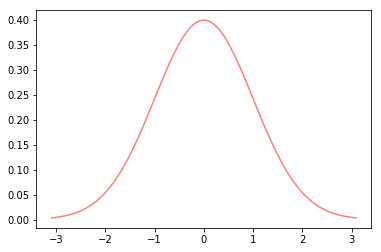

In [17]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
# plots the shape of a normal distribution  (you can change these!)
mean = 0
variance = 1

fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.norm.ppf(0.001, loc=mean, scale=variance), stats.norm.ppf(0.999, loc=mean, scale=variance), 100)
ax.plot(x, stats.norm.pdf(x), 'r-', alpha = 0.5)


To compute the area under the curve between -1 and 0 you can use the "cumulative density function" which is basically the value of this integral up to a given value.

In [23]:
dist = stats.norm(loc=mean, scale=variance) # this "freezes" the distrubition with the given parameters saving some typing
print(f"The value of the integral up to the value 0.0 is {dist.cdf(0)}")
print(f"The value of the integral up to the value -1.0 is {dist.cdf(-1.0)}")
print(f"The value of the integral between -1.0  and 0.0 is {dist.cdf(0)-dist.cdf(-1)}")

The value of the integral up to the value 0.0 is 0.5
The value of the integral up to the value -1.0 is 0.15865525393145707
The value of the integral between -1.0  and 0.0 is 0.3413447460685429


## Other useful distributions

There are many other useful distributions, these include the `t` distribution, the `F` distribution, and the chi squared distribution. We will soon discover more about the `t` and `F` distributions when we discuss t-tests and ANOVAs in later chapters.

## Summary of Probability

We've talked what probability means, and why statisticians can't agree on what it means. We talked about the rules that probabilities have to obey. And we introduced the idea of a probability distribution, and spent a good chunk talking about some of the more important probability distributions that statisticians work with. We talked about things like this:

-   Probability theory versus statistics

-   Frequentist versus Bayesian views of probability

-   Basics of probability theory

-   Binomial distribution, normal distribution

As you'd expect, this coverage is by no means exhaustive. Probability theory is a large branch of mathematics in its own right, entirely separate from its application to statistics and data analysis. As such, there are thousands of books written on the subject and universities generally offer multiple classes devoted entirely to probability theory. Even the "simpler" task of documenting standard probability distributions is a big topic.Fortunately for you, very little of this is necessary. You're unlikely to need to know dozens of statistical distributions when you go out and do real world data analysis, and you definitely won't need them for this book, but it never hurts to know that there's other possibilities out there.

Picking up on that last point, there's a sense in which this whole chapter is something of a digression. Many undergraduate psychology classes on statistics skim over this content very quickly (I know mine did), and even the more advanced classes will often "forget" to revisit the basic foundations of the field. Most academic psychologists would not know the difference between probability and density, and until recently very few would have been aware of the difference between Bayesian and frequentist probability. However, I think it's important to understand these things before moving onto the applications. For example, there are a lot of rules about what you're "allowed" to say when doing statistical inference, and many of these can seem arbitrary and weird. However, they start to make sense if you understand that there is this Bayesian/frequentist distinction.

